In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [30]:
df = pd.read_csv('Melbourne_housing_FULL.csv')
df = df.drop(['Address', 'Postcode', 'Propertycount', 'Landsize',
            'BuildingArea', 'Lattitude', 'Longtitude', 'YearBuilt', 
            'CouncilArea', 'Method', 'SellerG', 'Distance'], axis=1)

my_imputer = SimpleImputer()
df[['Price']] = my_imputer.fit_transform(df[['Price']])
df[['Bedroom2']] = my_imputer.fit_transform(df[['Bedroom2']])
df[['Bathroom']] = my_imputer.fit_transform(df[['Bathroom']])
df[['Car']] = my_imputer.fit_transform(df[['Car']])

df = df.dropna()

df = df.astype({'Price': 'int', 'Bedroom2': 'int', 
                'Bathroom': 'int', 'Car': 'int'})
df = df.drop_duplicates()
df = df.reset_index(drop=True)

df

,Suburb,Rooms,Type,Price,Date,Bedroom2,Bathroom,Car,Regionname
0,Abbotsford,2,h,1050173,3/09/2016,2,1,1,Northern Metropolitan
1,Abbotsford,2,h,1480000,3/12/2016,2,1,1,Northern Metropolitan
2,Abbotsford,2,h,1035000,4/02/2016,2,1,0,Northern Metropolitan
3,Abbotsford,3,u,1050173,4/02/2016,3,2,1,Northern Metropolitan
4,Abbotsford,3,h,1465000,4/03/2017,3,2,0,Northern Metropolitan
...,...,...,...,...,...,...,...,...,...
34512,Yarraville,4,h,1480000,24/02/2018,4,1,3,Western Metropolitan
34513,Yarraville,2,h,888000,24/02/2018,2,2,1,Western Metropolitan
34514,Yarraville,2,t,705000,24/02/2018,2,1,2,Western Metropolitan
34515,Yarraville,3,h,1140000,24/02/2018,3,1,1,Western Metropolitan


In [31]:
import datetime
def to_year(date_str):
    return datetime.datetime.strptime(date_str.strip(),'%d/%m/%Y').year
df['Date'] = df.Date.apply(to_year)
df = df.astype({'Date': 'object'})
df.Date.value_counts()

2017    19645
2016    10208
2018     4664
Name: Date, dtype: int64

In [32]:
suburb_dummies = pd.get_dummies(df[['Type']])
regionname_dummies = pd.get_dummies(df[['Regionname']])
date_dummies = pd.get_dummies(df[['Date']])
df = df.drop(['Suburb', 'Type', 'Regionname', 'Date'],axis=1).join(suburb_dummies)
df = df.join(regionname_dummies)
df = df.join(date_dummies)

In [33]:
df

,Rooms,Price,Bedroom2,Bathroom,Car,Type_h,Type_t,Type_u,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Date_2016,Date_2017,Date_2018
0,2,1050173,2,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
1,2,1480000,2,1,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0
2,2,1035000,2,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,3,1050173,3,2,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0
4,3,1465000,3,2,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34512,4,1480000,4,1,3,1,0,0,0,0,0,0,0,0,1,0,0,0,1
34513,2,888000,2,2,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1
34514,2,705000,2,1,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1
34515,3,1140000,3,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1


In [34]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

train, test = train_test_split(df, test_size = 0.2, random_state=512)

X_train = train.loc[:, df.columns != 'Price']
y_train = train.Price

X_test = test.loc[:, df.columns != 'Price']
y_test = test.Price


In [35]:

lm = LinearRegression()
lm.fit(X_train.values, y_train.values)

# predictions = lm.predict(X_test)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
predict_train = lm.predict(X_train.values)
mean_squared_error(y_train, predict_train)

216166093212.2087

In [37]:
predict_test = lm.predict(X_test.values)
mean_squared_error(y_test, predict_test)

206810728097.15237

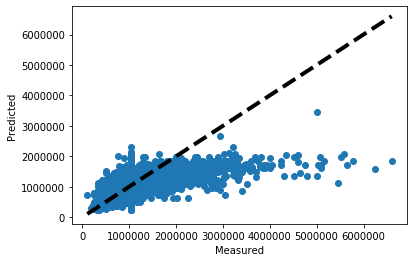

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_test, predict_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()